- DB 2번째 시간. SQL문에 대해 이야기하고 실습.
- 어제 빅데이터의 기본적 정의를 얘기했고, 데이터의 종류로 따지면 정형, 비정형, 반정형으로 나뉨. 우리의 관심 대상은 비정형. 빅데이터를 바라보는 다양한 관점 중 데이터의 조직화, 정제, 인사이트 찾으려는 노력에 따라 클라우드로 대표되는 병렬분산처리, 하둡, 스파크 등이 존재하며, 이를 기반으로 분석을 원한다면 데이터 분석, 기계학습에서는 labeled된 데이터를 보고 모델을 학습시키며 본 과정은 해당 과정.
- DB: 데이터를 저장하는 곳.
    - DB의 필수 요건. 항시성- 데이터를 언제나 현 시점에서 반영된 형태로 누구든 공유, 가져갈 수 있어야 하고, 조각나 있어서 통합된 형태로 관리되어야 하고, integrated...
    - 이를 RDBMS가 쉽게 관리해주며, RDBMS는 DB 관리를 위한 프로그램의 집합. 서버의 형태로 존재하며 다수의 사용자가 원할 때마다 바로 이용 가능하도록 제공.
    - 그 중 우리는 관계형 DB, RDBMS에 대해 다루며, SQLite를 가지고 실습 예정.
    - 실제 데이터의 조각과 어떻게 가져와야 하는지. 기본키, row의 identity를 갖고 있는 PK와 다른 테이블에서 참조 가능한 FK를 어떻게 가져와서 조인하는지.
    - 오늘은 이걸 실제 DB에 접근, 일정한 형태의 문법을 가지고 가져올 수 있도록 하는 SQL문을 다룰 것.
- SQL문: 대부분 표준 존재. but 간혹 RDBMS에 따라 지원하는 SQL문이 있기도, 없기도. 데이터 타입도. SQLite는 join 연산도 1가지만 지원.
- DDL, DML, DCL... 그냥 말 그대로 제일 중요한 건 관리 관련 조작어. 실제 데이터를 저장하고, 가져오고, 테이블의 규칙이나 컬럼을 변경할 때 필요. select insert delete... 쓰는 법. 데이터 저장, 가져오기 위해 DB 필요. 생성, 삭제 관련. 어떻게 데이터를 정의할 것인가 = DDL. 다수의 사용자, 롤백 할 일 없음. RDBMS에서 관리 시 쓰는 거니까 몰라도 됨.

- SQL문. 새로운 문법. 여러 절로 구성. 3개의 절로 구성된 경우. 위에 있는 게 명령어. 아래의 set은 어떤 걸 어떻게 업데이트시킬 지. 문과 절을 구별할 줄 알면 됨. select문, update문... where절. 각 절에는 여러 속성 포함. 서술어: 뭐를 뭐로.
    - set: 세팅. 실제 데이터 반영을 써줄 것.
    - where: 조건. 특정 조건에 맞는 데이터를 어떻게 바꿔라. 어디서? update에 있는 테이블에서.
    - 대소문자 구별 불필요. 관습적으로 대문자 사용. 아스키코드 65번 = A라서 빠르게 연산하기 위해서라는 설.
    - 우리도 명령은 대문자, 테이블, 컬럼, 데이터, 실제 SQL문에 들어가는 파라미터는 소문자로 쓸 것.

- 문에는 여러 절이 들어감.
    - 어디서 뭘 할 지. 어떤 테이블을 만들어라, 없애라...
- 각 데이터 타입. 이것도 마찬가지로 다 알 필요 없음. RDBMS마다 다름. 지원하는 애, 안 하는 애... 그 중 대표적인 것들만 언급.
    - boolean도 RDBMS마다 다름. 우리가 아는 것: TRUE, FALSE. 1비트. but 아닌 경우 있음. 저장장치 여유 있어서 이제 계산 불필요. 과거에는 데이터 사이즈 최소한으로 줄였어야 함. 요즘은 불필요. 필요하면 CPU 바꾸면 됨. 램 바꾸고, SSD 달면 됨.
        - int형 1바이트 써도 됨.
    - char 2종류. char과 varchar.
        - char: 1바이트 문자 저장. 몇 바이트를 만드냐에 따라 문자열 저장 가능. 잘못 세팅하면 비밀번호 잘림. 고정길이. char(10) -> 10byte까지만 저장 가능. 남아도 10byte 차지.
        - varchar: 가변형. max 10. 안 쓰면 0. 다만 최대치 존재. 보통 varchar 사용할 것.
    - numeric 변수. 숫자. 정수, float 등 지원.
    - date: 날짜 저장 시 사용. 날짜, 시간, 날짜+시간, unixtime(micro second 숫자 나열)... 시스템 시간, 사용자 시간 등 하면서 보면 됨.
    - large object: clob, blob. byte 타입으로 쓸 건지 char 타입으로 쓸 건지. 장문의 포스팅, 글을 원하면 CLOB 타입, 이미지를 원하면 BLOB 타입.
    - byte와 char 구별 필요.
    - RDBMS마다 지원 다름. 꼭 확인하고 사용. SQLite는 대부분 지원 안 함.

- boolean 변수 사용 방식. 주로 flag 만들 떄 사용. 회원가입 여부, 동의 여부... 여러 개 있으면 int형이나 char타입이 나음.
    - 권한 풀어줄 떄 값만 바꾸면 됨.
- char. RDBMS마다 다른데, 기본값 여부는 세팅에 따라 다름. DB config 파일 설정에 따라 다름.
    - 고정길이. char(3) -> 3글자만 입력.
- varchar: 가변형 길이의 char. 최대 maximum까지.
- int, smallint... 보통 word 단위라고 함 CPU에서. CPU 코어에서 제공해주는 bit 수만큼. 32비트, 64비트... 구별 위해 integer를 32bit로 명령하고 int64 따로 명령하는 경우도.
- 숫자... 바이트 수만 다름.
- date: 특별할 것 없음.
- clob: lob 타입 변수. 매우 큼. kb, mb, gb...
    - 장점: 웹은 오픈되어 있음. 웹서버 제한 없으면 어떻게든 접근 가능. then 중요한 데이터 업로드 시 url만 알면 가져갈 수 있음. 이를 막으려면 DB에 넣어놓고 제공하면 됨. 데이터 부하가 커지겠지만. 요즘은 이런 타입 다수 사용. 구글 이미지 검색 등 해 보면 나중에 알겠지만 base64로 줌. 이미지 url이 아니라. 이런 걸 할 떄 db에 넣어놓고 쓸 수 있으니 lob 타입의 존재 정도만 알기.
- 앞에서 본 데이터 타입 있고, MSSQL, 오라클, MySQL... 어떻게 지원하는지 테이블. 누구는 지원 하고 누구는 안 하고 비트, 바이트... 조금씩 다름.

- SQL문. 처음에 데이터 저장 위해 테이블 필요. 테이블 생성, drop 용도의 데이터 정의어, DDL.
- CREATE문. 절로 구성. CREATE 명령어, 뭘 만들건지(테이블, DB...), 파라미터.
    - 무슨 테이블. 릴레이션 이름, 그 안에 들어가는 column 정의... 안에 여러 열이 들어감. numeric, char...
    - 제약조건. autoincrement, unique... 제약조건들.
        - notnull = 이 필드는 반드시 채워져야 함.
        - unique: PK와 다름. 컬럼의 값이 서로 겹치면 안 됨.
        - PK, FK...
        - not null이면 unique, 비면 안 되면서 서로 겹치면 안 되는 경우 = PK. PK의 경우 RDBMS에서 해시화해서 관리. 과거 B트리로 데이터 주소 두고 해시 테이블 만들어서 바로 액세스하는 구조로 만들었음. 그런 걸 RDBMS가 해주니까 몰라도 됨. 그럴 떄 사용.
        - FK는 지원 하기도, 안 하기도. 지원하는 경우 꼭 써줘야 함. MySQL, SQLite는 없어도 됨. 다이어그램 그릴 거면 필요하지만 사용에 지장 없음.
        - default값: int면 0, 문자형이면 '' 등. 디폴트값 설정.
        - index: 해시화 할 건지.
        - PK, 유니크, notnull 등 많이 쓸 것.
    - 예시
        - 테이블 내의 컬럼들. ID라는 이름의 컬럼을 integer type으로, PK로 설정 -> 실제 제약조건은 not null이면서 unique. 겹치면 안 되는 값들. int니까 정수형 숫자 나열.
        - fist name varchar -> 최대 50자. 필수 입력 항목. last name도 마찬가지.
        - birth: datetype.
        - 5개의 어트리뷰트를 가지는 테이블이 생성됨.
        - 문법은 조금씩 다름. int, numeric... SQL문은 형식은 같으나 지원하는 건 조금씩 다름.
        - 빈 테이블이 생길 것.
- drop은 완전 삭제 시 사용. 테이블, DB 없앨 때 사용. 완전 삭제. 우리는 쓸 일 없어야.
- truncate: 자주 사용. 데이터 삭제 후 초기화. 조건까지도. 보통 개발서버에서 개발 열심히 하고 본서버로 옮긴 후 더미 데이터 날릴 때 사용.
    - drop, delete의 경우... truncate는 초기화. drop은 없던 걸로 돌림. 존재 자체를. drop, delete는 안 쓰는 걸 추천.
- alter: 수정 시 사용. 테이블 추가, 컬럼 삭제, 컬럼 데이터 타입 변경 등. 그럴 일 없을 것. 중간에 꼬이는 것보다 새로 만드는 게 나음.
    - alter table, 어떤 테이블에서 바꿀 지. add 컬럼, 데이터 타입. 컬럼 삭제, 기존 컬럼 수정 modify... modify 안 쓰는 거 추천: 데이터 들어있을 떄 문제 발생 가능. 데이터 타입 바꾸면 문제 발생 가능. so 정기점검 필요하고 DB 이동 시 문제가 되는 이유 = 넣지 말아야 할 데이터를 잘못 넣었을 떄. so 쓰지 않는 것 추천.
- 실제 사용법. 예제. sync라는 이름을 가진 테이블에서 버블이라는 컬럼 추가.
- SQL문은 ,로 구분. 변수와 변수 사이. 서술어와 서술어 사이는 , 로 구분. 문자열에는 ""나 '' 넣기.
    - 서술어는 ,로 구분하고, ;으로 문 종료.
    - 예제. alter로 테이블 수정. 컬럼 추가, modify(데이터형 변경-데이터 일부 날아갈 수 있음. 복구 불가능.), 컬럼 삭제...

#### DML
- 데이터 조작에 필요한 명령어들. insert, select, update, delete(안 쓰는 것 추천)
- 과거에는 포스팅 삭제 시 진짜 delete로 날렸음. 00년대 초.
- insert: 데이터 입력용. 테이블 이름, 컬럼별, values에 실제 값. 정식 문법.
    - 1개 이상. 복수개 투입 가능. 표준 문법.
    - 입력할 컬럼 전부 해당 -> 빠른 방법 가능. 컬럼 무시하고 value만 가지고. 알아서 들어감.
    - 입력할 컬럼 수 =/= DB 컬럼 수 -> 표준 문법 사용.
    - PK는 auto increment하면 건들 일 없음.
    - 예시: 컬럼에 데이터 추가. datetype 몰라도 문자열 들어감 -> char 또는 varchar일 것. 2개 넣으면 입력되고, 대부분 언어에서 그렇지만 insert 잘 들어가면 메세지 없음. 응답 없으면 좋은 징조. 잘 들어간 것. 추후 확인은 last inserted id 등으로. 마지막으로 입력/수정/적용된 애들. 오류 발생 시 구문 에러 출력. syntax error는 간단. 그 외에는 별다른 메세지 출력 X.
        - SQL문으로 유추 가능: 테이블 구성, 컬럼 테이블 등.
            - 가끔 개인 사이트 보면 SQL 에러 나는 페이지 존재. 컴퓨터 공학, 과학의 취약점. SQL문이 뜨면서 어떤 테이블 구조를 쓰는지, SQL문 하나로 취약점 발견 가능 -> 공격 가능.
        - 기존 데이터 없다면 같은 데이터로 구성된 2개의 데이터 들어가 있을 것.
    - insert문 예제. 컬럼 7개, 입력하는 insert문은 customer라는 테이블에 6개의 컬럼에만 데이터 입력. 총 7개 중. so 저런 식으로 어떤 컬럼에 데이터를 입력할 지, value 등.
        - 결과 데이터 보면 customer ID 존재: 제약조건 = auto increment = not null이면서 unique = PK. 다른 설명 없이 유추 가능.
        - 같은 테이블. customer. 개수 감소. 3개의 컬럼에 데이터 입력, 실제 들어간 걸 보면 null = 해당 컬럼 null 허용. 3개 컬럼 해당: 필수 입력 안 해도 되는 항목. 회원가입시 체크 불필요. 여러 다이어그램 그리는 이유: 이를 가지고... 화면 설계도 가능.
        - 전부 문자열. char varchar는 알 수 없지만 customer id만 in, pk, auto increment. null 허용했을 3열. default값 없고, 인덱스 지정 컬럼 없음. 겹치는 글자 존재 가능; 나라, 우편번호 등. 겹치는 것 허용했으니 index, unique 아님. 해석은 이와 같이 하기.
- select: 데이터 가져오기. 모든 일은 여기서 발생.
    - select문 관련 join, 여러 2~3개 테이블 조인 후 where, groupby, order 등으로 복잡히 만들 거고, select문 때문에 SQL문 최적화 필요. 테이블 묶고 어떤 컬럼 가져오냐에 따라 속도차이 발생.
        - 수집은 다 할 것. 지구 상 모든 웹 데이터 가져올 수 있음. 조별로 하면서 데이터 수집 고민 않아도 됨. 100% 가져오니까. DB에도 넣을 수 있음. insert만 하면 됨. 가져오는 게 문제.
        - select: 2개의 절로 구성. 어떤 테이블에서 어떤 컬럼을 가져올지. from절은 어느 테이블에서 가져올 지. select from -> 어느 테이블에서 어느 컬럼 가져와라. 1억건 있으면 다 가져올 것. so 조건 필요.
        - 예제: SQL문 보면 알 수 있음. 릴레이션 이름 = customers. from절: name, city 열만 가져올 것. 프로그래밍 언어에 따라 다르지만 딕셔너리, 리스트 형태로 가져올 것. array로 가져오기도. 파이썬 사용한댔으니 딕셔너리 리스트로 가져올 것. row가 5개 있으니까. 같은 데이터 형태 띄는 애를 5번 반복 -> list 형태로 가져올 것.
        - select * : 다 가져오기.
        - 기본 select문에 여러 가지 섞을 것. 눈에 보이는 절 7개 다 써도 되고 그 중 몇 개만 써도 됨.
        - where절 제일 많이 사용. 조건이 들어감. 특정한 데이터. 예를 들어 A 시작 데이터만 가져오기, A 사이트 데이터만 가져오기, 길이가 10cm 넘는 애만 가져오기... 이런 거 할 떄 where절 사용.
        - groupby: 그룹으로 묶어서 가져옴. 총 3가지 종류 값 -> 3개로 묶어서 가져옴.
        - having: groupby에 사용. 특정 조건을 갖고 있는. 예를 들어 abc, 데이터가 abc abc abc... 하면 그룹바이 하면 a, b, c별로 묶일 텐데 having a 하면 a 있는 애들만 나올 것. 아마 쓸 일 없을 것.
        - orderby: 순서. acent, descnet. 내림차순 오름차순. 숫자는 별 거 없고, 문자의 경우 아스키코드, 유니코드 정수의 형태. 한글은 유니코드 ㄱㄴㄷㄹ, ㅏㅑㅓㅕ 순. EUC-KR 등을 쓰면 제멋대로. 코드 테이블 봐야 함. 대부분 순서대로 가져오니 PK나 date 순으로 가져오게 할 거고, as는 별칭 달기. 테이블 이름도 길어질 수 있으니 축약해서 쓸 떄 사용. 앞으로 이 테이블을 a라고 명칭하겠다. 2개 이상 테이블 가져옴 -> 길 것. 컬럼 쓸 떄도 이 컬럼은 어느 테이블에서 가져온 건지 써줘야. 길어짐. 그럴 떄 바꿔서 써주는 용도.
        - 하나의 문; select문 중첩 사용 가능. then 한 문은 무조건 괄호 안에 넣어야.
    - select문 가져오는 구조.
        - T 테이블의 모든 데이터 가져오기.- 모든 컬럼 모든 row 가져옴. T table 결과와 같을 것.
        - C1만 가져오기 -> 첫 열만 가져옴.
        - 하나의 row만 가져오기.
        - c1 순서를 내림차순으로. 큰 것부터. limit으로 0,1, 1,0 식으로 하면 전체 데이터 중 slice. 데이터 하나만 가져와야 할 때 있음. 잘 모르면 다 가져와서 파이썬 등에서 하나씩 불러옴. but 메모리 상에는 바로 올라와있는 상태. 그렇게 코드 짜면 안 됨. SQL문에서 최적화 가능한 건 다 최적화해줘야.
        - SQL, RDBMS 처리 속도 생각보다 빠름. 처리 끝내고 가져오는 게 좋음. SQLite의 경우 파일 DB여서 속도가 조금 느리긴 함. but 체감할 정도는 아님.
        - where절에 들어가는 조건, 연산자. equal, not equal... 엑셀 써봤으면 저렇게 씀. 보통 !=을 쓰는데, 저기서는 <>로 씀. 아마 많이 안 쓸 것.
        - between: 범위. like는 주로 문자. 정규식 아니지만 정규식처럼 쓸 수 있음. 특히 게시판 검색 시 like 사용.
            - 정규식 패턴. 정규식 아님.
            - 와일드 카드 % 존재.
        - IN: 특정 어래이에 있는 애들.
    - where절: 뭘 지움. mytable에서 특정 row 날릴 것. where절 안 쓰면 테이블 다 날아감.
        - 특정 조건 제시: 컬럼이 100보다 크고 아이템이 저런 글자, 해머인 애. 그럼 두 가지 다 참이어야 해당 row를 다 지울 것. 싹 다 지울 것. 그래서 where절 잘 써야 함. 특히 drop 보면서.
        - in은 저기 속하는 애들. ename이 저 값 중 해당되는 애를 다 select로 가져와야 함. in으로. or로 쓸 수도 있고. 어찌됐든 저 중 속하면 됨. 가져다 쓸 것.
        - between: 날짜 할 떄 좋음. 잔고, 공급 등 할 떄. 특정 날짜 범위 지정, 1일치씩 가져오고 싶으면 date에 1일치, 1주일치, 1년치, 이런 식으로.
        - like. DB검색이라서 정확히 일치하는 패턴만 가져옴.
            - 와일드카드. %: 0개 이상이라는 의미. _ : 1칸. 무슨 글자 들어올 지 모르지만 a% = a로 시작하는 애들.
                - customer name에서 대소문자 구별 않는다고 하고, a%를 쓰면 몇 번쨰 row가 나오나? 1234.
                - 게시판 검색 시 들어감. 중고나라 검색 -> 앞뒤에 %가 붙음. 글 어디에라도 있어야 하니까. so 띄어쓰기에 따라 검색 결과가 달라짐. %까지 정확히 일치해야 하므로.
                - %a -> 앞에 뭐가 있든 a로 끝나면 됨. a로 끝나는 애 = 3번 row가 나올 것.
                - %or% -> or가 들어가 있는 애들. 3번, 4번.
                - _ r% -> 앞에 한 글자 있어야 하고, 2번쨰 글자 r이어야 함 -> 4번.
                - a_%_ % -> %를 0이라고 생각하면 됨. a로 시작하는 3글자 이상의 문자열. 몇 개가 들어오든 무관.
                - a%o: a로 시작, o로 종료. 중간은 무관.
                - NOT LIKE: 쟤 빼고. -> 5번. a로 시작하지 않음.
            - 문자열 컨트롤해서 가져올 떄 like 사용. 그 안의 문자열이 다 다를 것. 특정 구문, 특정 단어, 조합, 패턴이 있는 value값만 가져다가 컨트롤할 것. 그럴 떄 많이 쓸 것.
- 다음주에 정규식 할 것. 이거보다 10배 정도 복잡하지만 알아두면 도움 됨. 여러 패턴으로 풀 수 있는 문제 다수.

- delete, update
    - 요즘은 데이터 실제로 안 지움. flag라는 컬럼을 붙이거나 쓰레기통 테이블로 옮겨둠. 다시 복원하거나 히스토리 남기기 위해. 실제 지우는 일은 거의 없음. 여러분도 하고 싶으면 delete, update 쓰기보다는 flag 조절해서 하는 게 나을 것. 데이터는 버릴 게 하나도 없음. 그럼에도 불구하고 얘기하면 update, 처음 시작할 때 나왔던 구문. 아까 설명했으니 간단하게만 보면 update table, set절에 어떤 데이터를 어떻게 변화시킬 건지 파라미터, value, where절 특정 조건. 노란 박스는 조심하라는 이야기. where절 없으면 모든 데이터가 바뀜.
- 흔히 하는 실수. 업데이트문 쓰면. male을 female로 싹 다 바꾸는 경우도 있음. 다시 롤백할 수도 없고. so update 사용 시 조심해야 함.
- 예제. customer 테이블. 첫 번쨰 업데이트문을 보니 세미콜론으로 정상적으로 끝났고, 데이터 이름을 바뀜. 모든 데이터 이름이 바뀌면 안 되니까 where절에서 특정 row를 특정. delte도 마찬가지로 사용.
- 여러 개로 할 떄. mexico인 애들 이름을 다 바꿈. 2, 3번이 변경될 것.
- 마지막 예제처럼 하면 모든 데이터 이름이 바뀜. where절 잘 확인해서 사용해야 함.
- update문 만들 떄 where절이 맞는지 아닌지 모르겠으면 select로 바꾸면 원하는 데이터가 선택되는지 확인 가능.
- delete.
    - 하나 이상의 레코드, row를 지우는 법. where절도 똑같이 노란 박스 쳐 있으니 조심해서, 안 쓰는 것 추천. delete, update, 정의어의 drop 등은 대부분 안 쓰는 걸 추천. 주로 SQL injection이 update문에서 발생. 특히 flag로 회원 등급 조정 시 잘만 이용하면 update문의 flag도 변경 가능. 구식 방법이지만 where절에 condition이 들어가니까, customer id = 1에서 1 부분이 변수. 검색어를 치거나 로그인 시 무조건 저기가 True 나오게 바꿔주면 됨. 그래서 뒤에 customer id 모르니까 그냥 두고, or 1 = 1 이러면 둘 중 한 조건이 참이 되니까 무조건 수정됨. 이런 걸 막기 위해 띄어쓰기, = 등 막는데 간혹 안 막힌 사이트 존재.
    - update문과 비슷하게 동작. like를 섞어서 쓰면 특정 단어로 시작하는 모든 레코드, row를 전부 삭제 가능.
    - 2번째는 쓰면 안 되는 예. delete하면 테이블의 모든 데이터가 사라짐. 테이블은 남음. 제약조건에 해당하는 파라미터는 다 그대로 남음. PK = 5인데 다음 insert는 6부터 시작. 옵션도 다 초기화하려면 truncate 사용해야. then 다시 1부터 시작.
- join: 관계형 DB를 쓰는 이유. 관계 by PK, FK. 여러 join 있는데, 서로 다른 테이블이 1이라고 생각하면 됨. 겹치는 부분이 조금인 경우 있고, 여럿인 경우 있고.
    - 겹치는 부분 판단: 테이블을 만드는데, supplier, part 등 테이블 있었음. 이 떄 PK, FK 있었음. 걔를 기준으로 join 가능. join = 서로 다른 테이블 합치기. 조각나 있는 데이터를 join.
        - 안암 1, 2호점에서 가장 비싼 메뉴 찾기 등. 조각난 테이블 join.
    - 조인 옵션 4개 + cross join, 총 5개. SQLite는 inner join만 지원.
        - inner join
        - 조인 대상을 기준으로 보면 됨. 테이블1이 기준. 그 중 right join만 기준이 우측으로 바뀜.
        - 2개의 테이블 존재. select를 할 건데, 저 컬럼들만 가져와서 조인하는 형태로 가져오고 싶음. 첫 테이블이 order인 듯. select문의 중심이 되는 애. from절의 누구인지. 2개의 원이 겹쳐져 있음 -> 왼쪽 원이 order. 아래 있는 inner join에서 join만 보기. customer 테이블과 조인. -> 중심은 위에 있는 테이블. 걔한테 아래 테이블을 join. join 옵션 존재. 기준. 겹치는 값 있어야 데이터 join할 것. PK, FK 갖고 있음. customer id를 FK로 가지고 있음. 아래의 PK값이 저기 들어있으니 FK라고 부름. 겹치는 부분이 있으니까, order에 있는 FK에 해당되는 customer 테이블의 PK가 같은 애들만 inner join. inner join은 서로 일치하는 애들. 2번, 37, 77번이 첫 테이블에 기록되어 있고, 이 중 2번만 있으니 하나의 데이터만 선택됨. 레코드 만든 법: select문으로. 가상의 하나의 새로운 row를 가져오는데, 그 row는 3개의 컬럼으로 이루어짐. order에서 order id, customer name, orderdate 등을 한 레코드로 가져올 것. 매칭이 1개 뿐이어서 양쪽에서 같은 값 가진 애만 나옴. join 중 서로 겹치는 경우, 같은 값들, 얘가 해당되어서 올 것. then 데이터가 조각난 애들을 통합해서 원하는 형태로 가공, 가져옴.
        - 데이터는 조각낼 수 있으면 조각 내는 게 관리하기 쉬움. 통째로 묶여있었다면 이름이 없거나 date가 없는 애들 존재 가능. missing data. 국가가 잘못된 값이거나 원하는 값이 아닌 경우 섞여 있을 수 있는데, 모든 레코드에 기억되어 있을 듯. 일일히 찾아내려면 힘든데 조각내면 order, customer, 각 테이블에서 수정, 추가하면 됨. join은 PK, FK만 잘 찾아서 넣어주면 되고.
        - 제일 많이 하는 형태: cross join. 방법: join 연산은 안 쓰고, table 2개를 씀. 2개 테이블 모든 데이터 가져와라 -> 모든 조합 만들어냄. 3개* 3개니까 9개 조합을 만들어냄. then 6개 뿐이던 데이터가 9개로 뻥튀기됨. 데이터가 100만개라면 100만개 * 100만개 cross join -> 개수 폭증 -> 메모리 많이 먹을 것. 메모리 충분하지 않으면 뻑 날 것. so 특정 조건에 맞는 애들만 join 옵션으로 하는 게 나음.

- 예제. 여러 문이 있음. 어디까지가 문? ; 가 있는 곳까지.
    - create문. create절로 시작, table 만들 것. table 이름은 department. 여러 컬럼으로 구성, 2개의 컬럼을 정의. 첫 번쨰 ID, 2번쨰 name. 데이터 타입은 id는 int, 2번쨰는 varchar 20, 최대 20자. 3번쨰는 int인데 PK 설정, not null unique. 절대 비어서는 안 되고 절대 값이 겹쳐서는 안 됨. 중복된 키 넣으면 중복이라고 오류 뱉을 것.
    - 한 테이블이 만들어졌고, 2번째도 똑같이 테이블 만듬. 만드는데, 1번쨰는 name이고, 최대 20자까지 넣을 수 있는 캐릭터형 컬럼. 2번째는 FK로 구성. 여기는 FK를 쓰는 명령어로 reference 사용. 이건 조금씩 다를 수 있음. FK를 dpt 테이블의 ID값을 가져옴. 이건 선언. 2개의 테이블을 만들었고 각 테이블은 2개의 컬럼으로 구성. 2번쨰 테이블은 PK 없이 2번쨰 컬럼이 FK -> 구조적으로 겹치는 부분 존재. PK와 FK. 둘을 join하면 됨.
    - 데이터 만들기. insert문이 총 10개. 테이블1에 4개 데이터 입력, 테이블2에 6개 데이터 입력. 총 10개의 데이터로 구성.
    - 테이블1: PK를 직접 써줬음. 겹치지 않게 int로. 2개의 컬럼으로 구성되어 있고 입력 데이터도 2개 value이니 컬럼명 생략.
    - 테이블2: value에 마찬가지로 하는데, 참조키도 넣어줌. 그리고 중간에 null 존재. 참조키에 제약조건 보면 허용 없으니까. 둘 join하면 missing data일 것. 겹치는 부분이 없으니까.
    - 이렇게 4, 6개의 데이터로 구성된 2개의 테이블, 이런 형태.
- cross join: 이렇게 쓸 수도 있고, 콤마로도 가능. employee -> 기준이 emp. 거기에 dpt 조인하면 emp는 무시되면 안 됨. 조합 가능한 모든 쌍을 만들어냄. 6* 4. 그 중 실제 필요한 건 5개 정도인데. 낭비하게 됨. cross join은 안 써야 함.
- inner join: 서로 겹치는 값만 연결. 기준 = employee. dpt를 on 절에 참조키, 걔들이 일치하는 애들만. 서로 일치하는 데이터셋 5개의 레코드만 나올 것.
- left join. 왼쪽이 기준. cross join과 다르게 왼쪽 기준으로 겹치는 애를 가져오고, 거기에 해당되는 애, 31 33 34는 해당되는 dpt에서 데이터를 가져올 거고, 나머지 해당 없는 null은 빈 값으로 남아있을 것. 여기서는 총 6개의 레코드 출력. 해당되는 값이 없으니 null인 채로.
    - 필요한 이유: 회원내역은 있고 구매내역 없는 경우, 구매내역 있는 사람만 대상으로 join해서 쿠폰 뿌릴지, 모든 가입자 대상으로 뿌릴 지. 이런 거 정할 떄 join을 어떤 거 쓸 거냐에 따라 결과 달라질 것.
- right join
    - 반대로 특정 상품을 산 사람들. 가져오는 건 employee, 기준은 우측. then 우측에는 31 33 34 35가 있으니 총 4개의 PK값이 기준. emp 테이블에 없어도 기준이 우측 테이블.
    - SQLite에서 지원 안 함.
- full outer join, 양쪽 모두 기준. key 값이 양쪽 모두에 있음. 겹치는 애들은 겹치는 애들끼리. left+right. inner join과 함께. inner join은 FK=PK면 다 가져왔고, left는 없어도 조인 대상이 되는 테이블을 대상으로 가져오고, right join은 해당되는 테이블 기준으로 가져왔고, full outer는 양쪽 기준. so 총 7개 가져옴. 우측 테이블에는 FK 없는 데이터가 있고, 좌측 테이블은 PK가 참조되지 않은 row 존재. 겹치는 5개와 겹치지 않는 양쪽 테이블의 row -> 총 7개.
    - 별 거 아닌 테이블인데도 쿼리가 길어짐 -> as문 쓰면 아래서 a.DID 등으로 사용 가능. 또는 column 이름 변경도 가능.
- 연습문제. 어제 본 테이블.
    - select문.
        - * from -> 해당 테이블 데이터 다 가져옴.
        - price가 11보다 큰 sells -> 2개 가져올 것.
        - sno, price만 가져와 컬럼 수 감소.
        - 조건 2개. pno와 price.
        - 조건 줄 때는 최대한 쳐낼 수 있는 걸 앞에 쓰는 게 좋음. 비교 대상 감소. 순서 바뀔 경우 걸러내는 대상이 훨씬 많아짐. 먼저 걸러내고 하는 게 좋음. 비교는 보통 앞부터 하므로.
        - cross join 방법 중 하나. from절에 테이블 2개. supplier, part. 각각 4개. 데이터가... 16개 생길 것. 모두 조합하면.
        - cross join 한 후 where절 사용 -> inner join 효과. 대신 비교 대상이 다름. inner join을 처음부터 했으면 겹치는 애들만 가져왔을 텐데. 이 형태로 하면 16개 중 where절로 쳐낼 것. 비교 대상이 달라짐. 데이터의 크기, 테이블 크기를 보고 join할 지 먼저 걸러낼 지 결정해야.
            - as를 썼으니 테이블 이름을 바꿈. inner join 형태가 될 것. 결과적으로. 거기서 name 가져오도록 함.
        - 3개 테이블 조인. supplier, sells, part... 매우 많으니 그 중 데이터 솎아낼 것.
        - insert, update... 데이터를 하나 추가했고, 이렇게 하면 아마 PK 지정되어 있으면 오류 발생. PK가 겹침.
        - PK가 아닌 듯. insert한 걸 보면. then PK로 예상된 NO가 2개 존재하고, 5개의 row 존재. 업데이트했으니 sno =1이며 pno=1인 애를 sells에서... 둘 다 1인 거 하나 뿐이니 제일 위에 있는 거의 price가 바뀔 것. 10에서 15로.
        - supplier에서 smith라는 이름 가진 애를 지우랬음 -> 2개 날아갈 것. 제일 마지막에 smith를 추가했으니.

- SQLite
    - 무료. 서버 불필요. 앱이나 혼자 쓸 때 많이 사용. 파일 DB라서 서버 불필요 -> DB 작업 후 넘겨주기 가능.
    - 대신 RDBMS 지원을 잘 지원 않음. 기본 문법 지원하나 동시 작업이나 접근권한 설정 등은 지원 X. 다만 가벼우니까.
    - 아나콘다에 포함되어 있을 것.
- DBMS를 보려면 커서 등 필요. 동시 접속해야 하니 일단 DB에 접속해야 함. 접속 툴 있고, 맥시멈 값이 있고 캐시 등 있음. 커넥션 할 떄 파일 DB니까 원래라면 IP, 계정이 필요. 그런데 얘는 파일 DB, 물리적으로 내 공간 -> 경로만 써주면 됨. then 파일이 생김. 그렇게 접속하거나, 파일 굳이 안 쓰고, 테스트 용으로 쓸 거면 메모리에 올리고 사용 가능. 그렇게 둘 중 하나 옵션 주고 쓰면 됨.
- 커서라는 객체. 트랜젝션과 연관 존재. 트랜젝션은 빠른 return 필요 -> 최적의 동작조건을 세팅해둠. select문의 경우 대부분 데이터를 불러오기에 매우 큼. 그런 데이터를 자주 쓰는 걸 모아놓고, 최근에 쓴 거 모아놓고, 이런 걸 관리해주는 애 = 커서. 커서로 실제 데이터에 접근. 커서는 순차적으로 하나씩 넘어갈 수 있고, 트랜젝션 단위로 넘어가고... 여러 가지 있는데, 대부분 SQL문에 따라 넘어갈 것. 일종의 포인터. 데이터를 담고 있거나, 위치를 가리키고 있거나. 커서를 누구에게 받나? 커넥션 객체에서. 거기서 SQLite 접근, 연결한 상태에서 작업할 커서 객체를 받을 것. 커서는 SQL문 수행에 쓸 것. insert든 데이터를 가져오든. SQL문은 이걸로 할 거고, excute(실행) 등 있음. 한 SQL문 실행. excutemany는 여러 개 수행. 동일한 SQL문 여러 번 할 떄 사용. 데이터 여러번 입력. 같은 테이블에 같은 구조로 값만 바꿔 넣을 떄 excutemany. script는 여러 SQL문 쓸 떄 사용. 추천 않지만 편해서 사용.
- fetch: 데이터 가져올 떄. 데이터 가져왔을 떄 커서가 특정 위치 가리키고 있을 것. 이 때 fetch에서 1개, 몇 개, 전부 다... 가져옴. 코딩 시 컴퓨터에 한계 있고, 필요한 데이터도 다르니까. SQL문 실행, 가져오는 식으로 구성.
- 데이터 타입 지원하기도 하고 안 하기도 한댔음. SQLite에서 지원하는 타입. 훨씬 개수 적음. 없다고 안 쓰나? 아님. 다른 걸로 쓰면 됨. bool 없지만 char나 int로 쓰면 됨.
- 5가지 있는데, byte 넣을 수도 있고, 앱 만들거나 할 떄 package해서 자바로 만들 텐데, 그런 거 싫으면 패키지 풀 수 있으니까 풀면 그 안에 이것저것 있을 것. 그런 걸 DB에 넣어둘 수 있음. json으로, byte타입으로 바꿔 넣고, char로 바꿔서 json 객체로 만들어 쓰고... 편의에 따라 다름. config 파일을 따로 뺴서 작동하는 게 편하면 그렇게 하고.
- 간단함. null, 숫자, 소숫점, 텍스트, 여기 text = char, varchar 상관 없이 모든 종류. byte 타입의 lob 타입. 이렇게 간단히 존재.
- execute. 하기 위해 여러 옵션 존재. 이 중 2가지를 볼 것. qmark와 namedstale. insertmany: 값만 바뀌고 테이블 구조는 동일. 그리고 트랜젝션, 커서 입장에서 보면 사용 장점: 파라미터만 바뀌고 SQL 구문 안 바뀜. then 트랜젝션에 SQL 구문 하나만 띄우면 됨. but 여기 아예 쿼리를 박아두면 쿼리가 변수에 따라 바뀌기에 서로 다른 애들로 인식.
    - 조금이라도 다르면 다른 쿼리. 구조, 컬럼, 조건 같아도 데이터가 달라지면 다른 쿼리. 다시 실행해야. but 변수 형태로 넘기면 쿼리문이 안 바뀌고 변수만 바뀌니 그럴 때 쓰기 좋음. 그런 식으로 변수를 지원하는 게 두 스타일. qmark는 구멍 뚫어놓고, namedstyle은 key value 쌍으로. 파이썬에서 리스트, 딕셔너리 사용 가능. 리스트 -> 컬럼명 몰라도 ??에 넣을 수 있음. named는 키밸류 쌍으로 원하는 데 투입 가능.
    - 2개의 컬럼을 가진 테이블을 만들고, 변수에 넣었음. execute해서 qmark 스타일로 밸류에 해당되는 걸 전달했음. iterable한 객체에. 2번쨰는 딕셔너리에 namedstyle로 넣고. commit도 넣어줄 텐데, 하나만 실행하니 commit 안 넣어도 됨. 데이터 1개 넣고 select문 -> SQL문이 커서 실행 -> 가져온 데이터 돌고 있음 -> 그 중 하나만 출력. 데이터 1개니까 하나만 있을 것.

In [1]:
import sqlite3

커넥션부터 만들기

In [2]:
conn = sqlite3.connect('memory') #메모리에 작업할 거면 메모리에 쓰라고 되어있으니.
cur = conn.cursor()#커서도 하나 만들 것. 커넥션이 만들어졌으면 커서 받아오기.
#커서에 일 시킬 것.

In [3]:
#create문, people 테이블, 컬럼에 name. 원래 하나의 문이 끝났으니 ; 찍어야 하지만 하나의 문이니 안 찍어도 알아서 해줌.
cur.execute('CREATE TABLE people (name_last, age);')

In [4]:
#동작함. 나중에 파일로 바꿔서 보면 됨.
#데이터 타입 지정 안 했으니 뭐가 들어갔을지 모름.

In [5]:
who = 'Yeltsin'
age = 72
cur.execute('INSERT INTO people VALUES(?, ?)', (who, age)) #큐마크 스타일, 데이터 2개

In [6]:
#테이블 만들었고, 데이터 하나 넣었고, select로 가져왔고...
cur.execute('SELECT * FROM people')

테이블, 인서트, qmark 스타일.
이제 namedstyle로 해보면 될 것.

In [7]:
cur.fetchall()

[('Yeltsin', 72)]

In [10]:
cur.execute('INSERT INTO people VALUES(:a, :b)', {'a':who, 'b':age})

In [11]:
cur.execute('SELECT * FROM people')
cur.fetchall()

[('Yeltsin', 72), ('Yeltsin', 72)]

In [12]:
data = [('a', 1), ('b', 2), ('c', 3)]
cur.executemany('INSERT INTO people VALUES (?, ?)', data)

In [13]:
cur.execute('SELECT * FROM people')
cur.fetchall()

[('Yeltsin', 72), ('Yeltsin', 72), ('a', 1), ('b', 2), ('c', 3)]

key값이 없으니 q마크 스타일로 넣어야.  
간단히 데이터 넣고 가져와봤음.

script: 처음에 commit 함. commit = 반영. 항상 마지막에 입력한 것 반영되어야. 앞의 경우는 SQL문을 하나만 수행. SQLmany도 같은 걸 여러 번 수행 -> 바로 반영. script는 아님. 앞에거를 반영해놓고, 그 후 데이터를 입력하면 commit해서 반영해줘야 함. 안 하면 반영 안 됨. 데이터 반영 안 되는 이유는 보면 알 수 있음.
executescript를 해보자.

In [20]:
#돌고 있는 커서 지워야 함.
cur.close()

In [21]:
#커넥션도 닫아줘야 함.
conn.close()

In [22]:
#다 닫혔으니 위에 애들 수행해도 안 될 것.

In [23]:
#다시 만들자.
conn = sqlite3.connect('memory')
cur = conn.cursor()

In [27]:
cur.executescript('''
    CREATE TABLE people (name, age);
    INSERT INTO people VALUES('a', 1);
''')#여러 개 입력, SQL문 하나 끝나면 세미콜론.

In [35]:
#테이블이 이미 있어서 에러 난 것. 당황하지 말고 다 닫고 다시 시작하기.
#(CREATE문 없애고 실행하면 정상 작동했음)

In [29]:
#데이터 형태를 다시 보자.

In [30]:
cur.execute('SELECT * FROM people')
cur.fetchall()

[('a', 1)]

In [31]:
#다시 커서, 커넥션 닫기
cur.close()
conn.close()

In [32]:
#이번엔 실제 파일에 해보자. 확장자는 무관.
conn = sqlite3.connect('ex1.db')
cur = conn.cursor()

In [33]:
cur.executescript('''
    CREATE TABLE people (name, age);
    INSERT INTO people VALUES('a', 1);
''')

In [34]:
cur.execute('SELECT * FROM people')
cur.fetchall()

[('a', 1)]

- DB 보는 애로 DB 브라우저 사용. 윈도우 버전도 존재. DB 열어볼 수 있음. 확인 가능.  
- sqlite browser .org  
- DB를 열 수 있음.
- UI는 윈도우는 조금 다를 수 있음.

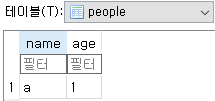

In [37]:
cur.execute('INSERT INTO people VALUES("b", 2)')#하나 더 넣어보고 DB 기록 확인하기

In [39]:
cur.execute('SELECT * FROM people')
cur.fetchall() #DB에 안 나와서 혼자 실험해봄

[('a', 1), ('b', 2)]

In [40]:
cur.executemany('INSERT INTO people VALUES (?, ?)', [('C', 3), ('D', 4)])

- 실제 DB에 반영되는지 확인해보자. 반영 시점을 보기 위한 것.

In [41]:
cur.executescript('''
    INSERT INTO people VALUES('E', 5);
    INSERT INTO people VALUES('F', 6);
    INSERT INTO people VALUES('G', 7);
''') #참고로 script에서는 qmark, namedstyle 사용 불가. 어느 쿼리의 변수인지 모르므로.

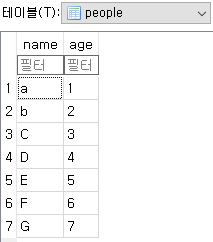
- 이번에는 어디까지 반영되나?
    - 그 전에는 반영되지 않고 있다가, script 실행 후 반영됨
    - insert는 반영이 안 되고 있었음. script 하는 순간 자동으로 summit되니까 싹 반영되는 형태로 나옴.
    - 중요한 이유: insert했다고 생각했는데 가져다 쓰려고 하면 안 나오거나, update했는데 구버전. 데이터 무결성에 있어서 commit을 어느 시점에 하냐에 따라 현재 시점에 반영된 걸 갖고 있을 수도, 아닐 수도 있음. so 모르고 있으면 commit을 반드시 할 수 있음.
    - 원래대로 하면 다시 입력하면 반영이 안 되었어야 함.
    - commit하면 강제 반영됨.
    - so select에는 별 문제 없음. 데이터 생성하고 입력할 때는 실제 반영 여부와 무관하게 commit하는 게 정신건강에 이로움. create문을 썼을 떄도 마찬가지.

In [43]:
cur.execute('INSERT INTO people VALUES("b", 2)')
conn.commit()

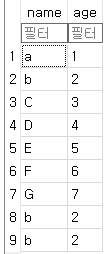

In [44]:
#테이블은 만들어보면 커밋됨.
#DDL 말고 DML에 commit이 필요하다는 걸 알 수 있음.

In [45]:
cur.execute('CREATE TABLE temp (aaa, bbb);')

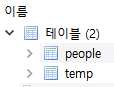

- select문 수행 후 수행하는 것. 데이터를 fetch해서 가져오는 건데, fetchall만 썼는데 one이랑 many도 있음. 마찬가지로 단일 row를 가져오느냐 여러 줄을 가져오느냐 다 갖고 오느냐. 우리 사이즈에서는 다 가져와도 무관.
- fetchone은 single 시퀀스 가져옴: 하나 묶여서 가져올 것. fetchmany는 list로 가져올 것. 그래서 파라미터로 몇 개 가져올 지 사이즈 쓰도록 함. 우리는 fetchall로, list 형태로 다 가져온 것.
- 이번에는 제약조건 넣어서 PK 선언. 데이터 타입도 선언할 것. 1번째는 PK에... PK는 not null 불필요. not null에 unique한 타입이 PK. int의 PK, int의 not null, 데이터 입력 시 insert하고, 비거나 다른 형태 메세지를 띄울 것. 그걸 볼 것.
- 그 전, drop table. 아까 drop 쓰지 말라고 했는데, 테이블 이름이 겹치는데 여러 번 수행해야 하는 경우 있음. 드랍 테이블에서 어쩌구저쩌구. 없는 테이블 날리라고 하면 오류 발생.

In [46]:
cur.close()
conn.close()

In [47]:
#그래서 조건을 하나 써줌. 있으면 지우고 없으면 그냥 두고.
#create table시 이거 한 줄 써주면 있으면 지우고, 없으면 새로 만듬.
#연습할 때에 한해서. 실제로는 데이터 날아가니까 하면 안 됨.
conn = sqlite3.connect('ex1.db')
cur = conn.cursor()

In [48]:
cur.execute('DROP TABLE IF EXISTS asdfa')

In [50]:
cur.executescript('''
    DROP TABLE IF EXISTS company;
    CREATE TABLE company(
        id   INT   PRIMARY KEY,
        name TEXT  NOT NULL,
        age  INT   NOT NULL,
        address TEXT,
        salary REAL
    );
''')

In [51]:
#이 상태로 데이터 하나 insert
cur.execute('INSERT INTO company VALUES(1, "AAA", 33, "asdf", 11.0)')

In [52]:
cur.execute('INSERT INTO company (name, age) VALUES("BBB", 44)')

In [53]:
conn.commit()

In [54]:
#SQLite는 PK도 not null 써야 하는 듯... 오류가 났어야 하는데 안 났네요...

In [55]:
cur.execute('INSERT INTO company (name) VALUES("CCC")')

IntegrityError: NOT NULL constraint failed: company.age

In [56]:
#이렇게 제약조건 먹히는 거 보려고 한 거니까.

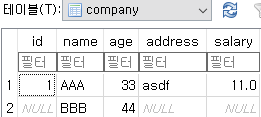
- 이렇게 들어가 있음. 그리고 not null 제약조건 때문에 CCC에서 오류 발생.
- PK에도 not null 제약조건 넣어줘야.
- text기에 50자 넘어도 가능할 것.

In [57]:
cur.executescript('''
    DROP TABLE IF EXISTS company;
    CREATE TABLE company(
        id   INT   PRIMARY KEY NOT NULL,
        name TEXT  NOT NULL,
        age  INT   NOT NULL,
        address CHAR(50),
        salary REAL
    );
''')

In [58]:
cur.execute('INSERT INTO company VALUES(1, "AAA", 33, "1222222222222222222222223133333333333333333111111111111111111111111111111111111111111113111111111111111112", 11.0)')

In [59]:
conn.commit()

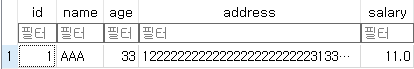
- 50자 넘게 됨. char50은 실제로 text 형태로 지원하니까 제약 둬도 의미 없음. SQLite에서는.
- so 기존 데이터 타입을 지원하긴 하지만 실질적으로는 텍스트 형태로 지원.

- 편법으로 쓰는 경우. connection에 execute함.
- 커서 대신 여기 써도 동작은 함. 다만 그 떄 그 떄 임시 커서를 리턴해줌. 이렇게 써도 되지만 정상적인 방법은 커서 객체 만들어서 컨트롤하는 것.

In [ ]:
conn.execute()

- insert문은 ppt에 있으니 생략. 테이블 만들고, insert할 때 namedstyle, qmarkstyle, execute many, script, 반영 여부, 강제 commit으로 전부 반영해서 DB에 저장까지.
- 브라우저로 열면 들어가 있을 것.
- 들어가 있는 상태로 select할 것; 아까 fetchall했는데 one, many... 어차피 커서 객체가 갖고 있을 것.fetch로 안 가져왔을 뿐 커서 객체가 가리키고 있을 것. 루프를 돌면서 가져오는 것. 간단하게. 정상적으로 제공되는 fetchone, all, many 함수 사용하는 게 낫기는 할 것.

update문을 해보자.

In [60]:
cur.lastrowid #마지막으로 들어간 row id 출력.

1

In [62]:
conn.total_changes #몇 번 반영되었는지.

3

- 업데이트 할 떄도 쓸 것. 몇 번 업데이트되었는지, 몇 개 변화되었는지.
- conn.total_changes로 확인.

In [63]:
cur.execute('UPDATE company SET name="test" WHERE id = 1;')

- DB 확인해보면 반영 안 됨. insert와 동일. commit 해줘야 함.

In [64]:
conn.commit()

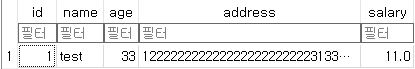

In [65]:
conn.total_changes #1개 반영되었다는 의미

4

In [66]:
cur.execute('UPDATE company SET address="test" WHERE id = 1;')
conn.commit()
conn.total_changes

5

In [67]:
cur.execute('UPDATE company SET address="test2" WHERE id = 1;')

In [68]:
cur.close()
conn.close()

In [69]:
conn = sqlite3.connect('ex1.db')
cur = conn.cursor()

In [71]:
cur.execute('SELECT * FROM company;')
cur.fetchall()

[(1, 'test', 33, 'test', 11.0)]

- commit 없이 커서, 커넥션 닫고 다시 커서, 커넥션 열고 fetchall로 가져와보면 이전 데이터가 나옴. 반영 안 되기 때문에.
- 메모리에서만 진행되는 것.
- so commit 해줘야.

- 커서가 지금까지 SQL문 수행했음. 커서에 SQL문이 다 들어있을 것. 그동안 했던 것. 그걸 dump 뜨는 것.

In [73]:
list(conn.iterdump())

['BEGIN TRANSACTION;',
 'CREATE TABLE company(\n        id   INT   PRIMARY KEY NOT NULL,\n        name TEXT  NOT NULL,\n        age  INT   NOT NULL,\n        address CHAR(50),\n        salary REAL\n    );',
 'INSERT INTO "company" VALUES(1,\'test\',33,\'test\',11.0);',
 'CREATE TABLE people (name, age);',
 'INSERT INTO "people" VALUES(\'a\',1);',
 'INSERT INTO "people" VALUES(\'b\',2);',
 'INSERT INTO "people" VALUES(\'C\',3);',
 'INSERT INTO "people" VALUES(\'D\',4);',
 'INSERT INTO "people" VALUES(\'E\',5);',
 'INSERT INTO "people" VALUES(\'F\',6);',
 'INSERT INTO "people" VALUES(\'G\',7);',
 'INSERT INTO "people" VALUES(\'b\',2);',
 'INSERT INTO "people" VALUES(\'b\',2);',
 'CREATE TABLE temp (aaa, bbb);',
 'COMMIT;']

- 지금까지 한 게 다 나옴. 들어있음. 커서가 작업헀던 내용이. 접속이 이루어진 후에.
- 커넥션을 통해 커서가 작업한 결과물. 이걸 확장자 sql로 넘겨주면 다른 DB에 가서 여기서 부터 시작할 것. 트랜젝션 start해서. 그리고 log를 보면 commit 반영까지 있음. 이렇게 넘겨주면 됨. 다른 DB로 옮겨가야 할 때. 그 예제. sqlite 공식 예제. 굳이 안 해봐도 될 듯.
- read, open은 해봤을 것. open했으면 close하던가 read하던가.

- ER 모델: 오늘 할 것. 밥 먹고 진행. 1시 40분까지 복귀.